Library

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

In [2]:
path = r'C:/Users/Raniah/Downloads/Bangkit/Capstone/model/'
TRAIN = os.path.join(path, 'training')
VALIDATION = os.path.join(path, 'validation')
TESTING = os.path.join(path, 'testing')

creating generstors of training, validation, testing

In [3]:
train_datagen = ImageDataGenerator(
        rescale = 1./255.
    )

train_generator = train_datagen.flow_from_directory(
        TRAIN,
        batch_size = 25,
        class_mode = 'binary',
        target_size = (244, 244),
        color_mode = 'rgb',
        shuffle = True,
        classes = ['bacterial', 'healthy']
    )

Found 7175 images belonging to 2 classes.


In [8]:
validation_datagen = ImageDataGenerator(
        rescale = 1./255.
    )

validation_generator = validation_datagen.flow_from_directory(
        VALIDATION,
        batch_size = 25,
        class_mode = 'binary',
        target_size = (244, 244),
        color_mode = 'rgb',
        shuffle = True,
        classes = ['bacterial', 'healthy']
    )

Found 74 images belonging to 2 classes.


In [4]:
testing_datagen = ImageDataGenerator(
    rescale = 1./255.
)

testing_generator = testing_datagen.flow_from_directory(
    TESTING,
    batch_size = 25,
    class_mode = 'binary',
    target_size = (244, 244),
    color_mode = 'rgb',
    shuffle = True,
    classes = ['bacterial', 'healthy']
)

Found 2558 images belonging to 2 classes.


Define the architecture of the model 

In [1]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', input_shape = (244, 244, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

NameError: name 'tf' is not defined

In [6]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [15]:
history = model.fit(
    train_generator, validation_data = validation_generator,
    #epochs = 15
)

  7/287 [..............................] - ETA: 9:33 - loss: 0.0271 - accuracy: 1.0000 

KeyboardInterrupt: 

visualisasi of results on training, validation, and testing

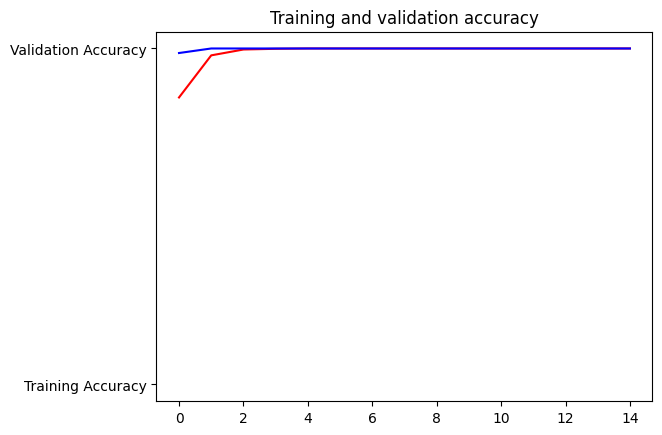

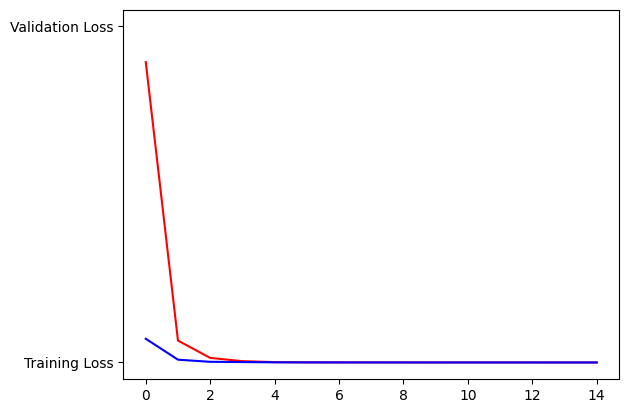

In [35]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 

# plt.plot(epochs, acc, 'r', "Training Accuracy")
# plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
# plt.title('Training and validation accuracy')
# plt.show()
# print("")

# plt.plot(epochs, loss, 'r', "Training Loss")
# plt.plot(epochs, val_loss, 'b', "Validation Loss")
# plt.show()

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Evaluasi Model

In [36]:
test_loss, test_acc = model.evaluate(testing_generator)
print('Test Loss :', test_loss)
print('Test Accuracy : ', test_acc)

103/103 [==============================] - 78s 729ms/step - loss: 0.0172 - accuracy: 0.9969
Test Loss : 0.01717902161180973
Test Accuracy :  0.9968725442886353


Predict

In [39]:
predict = model.predict(testing_generator)
prediction = predict[5]
print('Test Prediction :', prediction)

103/103 [==============================] - 59s 568ms/step
Test Prediction : [0.99998593]


Deployment

In [40]:
# to save the model
model.save('model.h5')
load = tf.keras.models.load_model('model.h5')

transfer learning from the inception mode

In [18]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

weights_files = 'C:/Users/Raniah/Downloads/Bangkit/Capstone/Code/model 1/model.h5'

pre_trained_model = InceptionV3(input_shape = (244, 244, 3),
                                include_top = False,
                                weights = None)

pre_trained_model.load_weights(weights_files)

for layer in pre_trained_model.layers:
    layer.trainable = False

ValueError: Layer count mismatch when loading weights from file. Model expected 188 layers, found 3 saved layers.